In [4]:
# SuperPixel Algorithms for Medical Data: Chest Xrays

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from skimage.segmentation import slic, quickshift, watershed, felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import sobel
import matplotlib.pyplot as plt
import cv2
import warnings; warnings.simplefilter('ignore')
from skimage.future import graph 
from skimage import  data, io, segmentation, color
import os

In [6]:
image_path = 'E:\\PhD\\test.png'
img = img_as_float(io.imread(image_path))

In [7]:
img.shape

(1024, 1024)

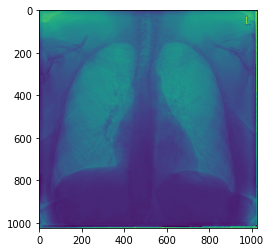

In [8]:
plt.imshow(img)

Linear Filter

In [19]:
segments = slic(img, n_segments = 500, slic_zero=False,compactness=.1, sigma=0.5)

In [20]:
segments

array([[  0,   0,   0, ...,  14,  14,  14],
       [  0,   0,   0, ...,  14,  14,  14],
       [  0,   0,   0, ...,  14,  14,  14],
       ...,
       [433, 433, 433, ..., 469, 469, 469],
       [433, 433, 433, ..., 469, 469, 469],
       [433, 433, 433, ..., 469, 469, 469]], dtype=int64)

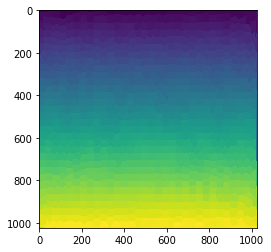

In [18]:
plt.imshow(segments)

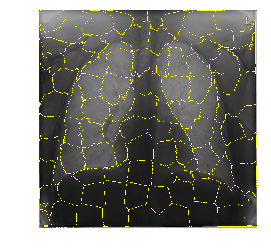

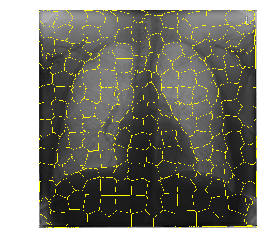

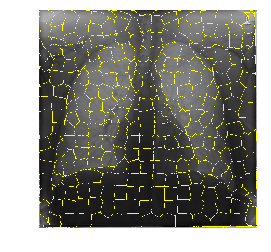

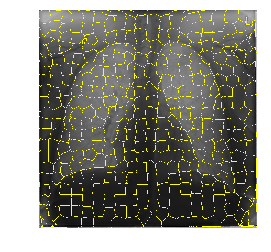

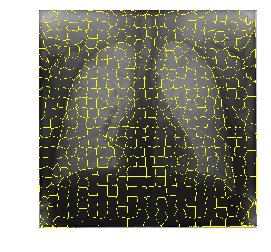

In [31]:
for numSegments in (100, 200, 300, 400, 500):
        segments = slic(img, n_segments = numSegments, slic_zero=False,compactness=.1, sigma=0.5)

        fig = plt.figure("Superpixels -- %d segments" % (numSegments))
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(mark_boundaries(img, segments))
        plt.axis("off")
 
        plt.show()

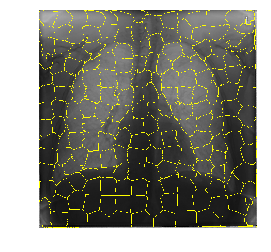

In [41]:
segments = slic(img,  n_segments=200, compactness=0.1, enforce_connectivity=True)
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.axis("off")
 
plt.show()
#plt.savefig('slic.png')

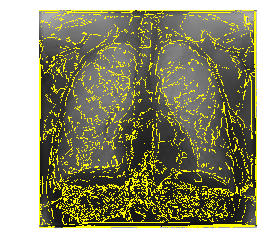

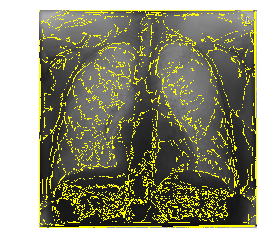

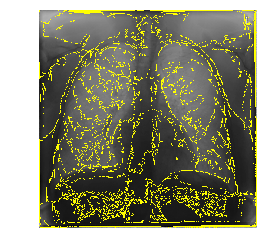

In [25]:
for numSegments in (100, 200, 300):
        segments = felzenszwalb(img, scale=numSegments, sigma=0.5, min_size=50)
        fig = plt.figure("Superpixels -- %d segments" % (numSegments))
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(mark_boundaries(img, segments))
        plt.axis("off")
 
        plt.show()

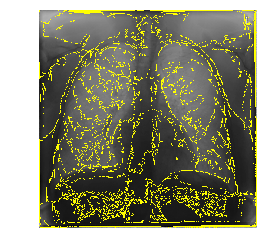

In [26]:
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)
fig = plt.figure("Superpixels -- %d segments" % (numSegments))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.axis("off")
plt.show()